# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Libraries

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn
lr = LinearRegression()

In [9]:

#Some configuration for matplotlib and seaborn to look pretty
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (18.,9.)})
sns.set_style("whitegrid")
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here. 
x_values = (17,51,27,21,36,48,19,26,54,30)
y_values = (10,1,5,9,4,2,9,6,0,3)
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='X', ylabel='Y'>

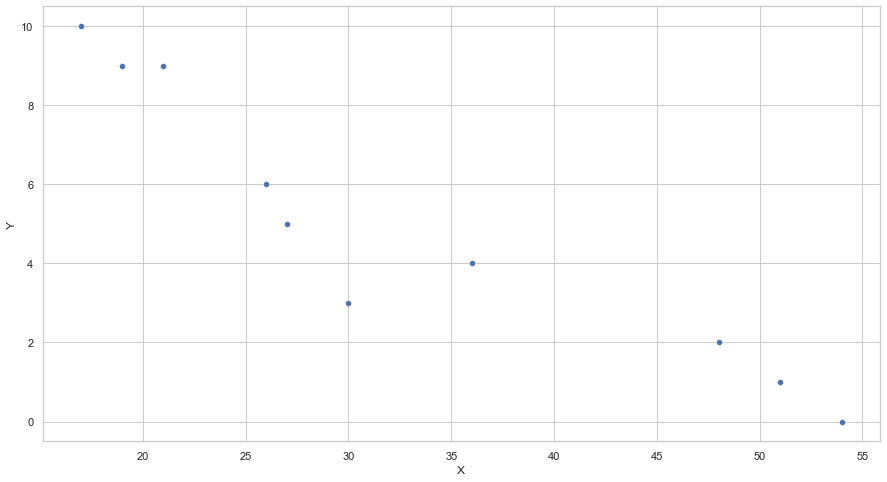

In [3]:
# Your code here.
sns.scatterplot(x=student_data['X'], y=student_data['Y'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
## Observing the plot, it seems there's a negative correlation between being late (y) and the age of the students (x).
## Being late seems to be the dependent variable and Age the independent. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
## Covariance is -45.566667
student_data.cov()

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


In [6]:
## Correlation is -0.939163
student_data.corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [7]:
# --> Both measures are negative values, confirming the negative relationship between the two variables. 
# Covariance shows how the two variables differ, whereas correlation shows you how the two variables
# are related.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
# Your response here.
# Your response here.
results = smf.ols("X ~ Y", data = student_data).fit()
results.summary()

/Users/peterbw/opt/anaconda3/envs/IronhackDAFT/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           5.57e-05
Time:                        12:35:43   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6988      2.791     18.168      0.000      44.264      57.134
Y             -3.6324      0.470     -7.734      0.000      -4.716      -2.549
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.714
Skew:                          -1.010   Prob(JB):                        0.424
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

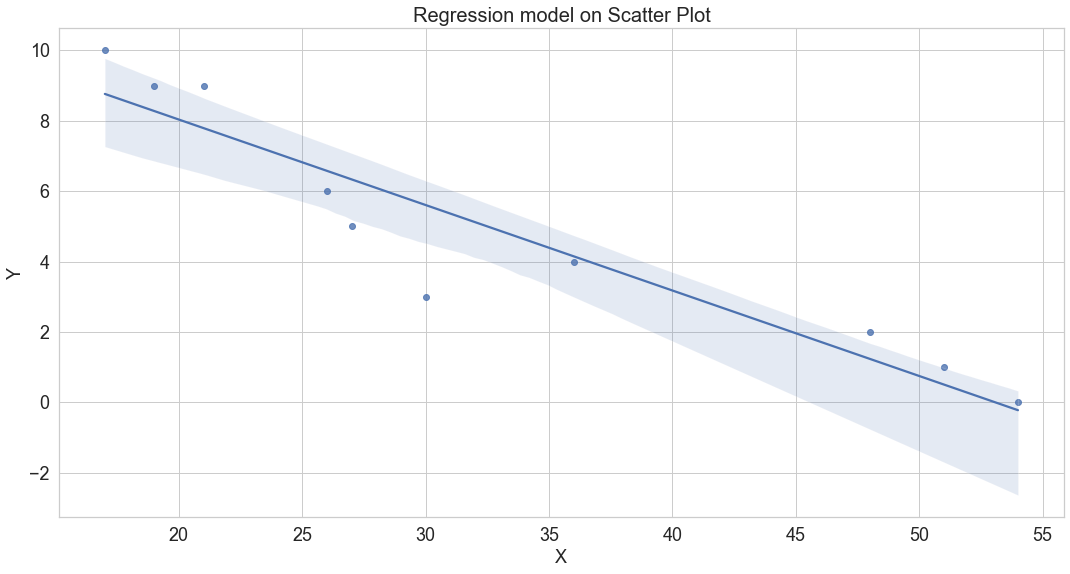

In [11]:
# Your code here.
plt.title('Regression model on Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Tardies')
sns.regplot(x="X", y="Y", data=student_data);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [16]:
# Your response here. 

# Your response here.
# Save the variables x,y
X = student_data[["X"]]
y = student_data.Y
# train the algorithm
lr.fit(X,y)
student_data["predict_algorithm"] = lr.predict(X)
student_data.sample()

,X,Y,predict_algorithm
5,48,2,1.233406


In [21]:
# We want the smallest value, as close to zero as possible: how bad it is 
print(f"MAE: ", round(metrics.mean_absolute_error(student_data.Y, student_data.predict_algorithm), 2))
print(f"MSE: ", round(metrics.mean_squared_error(student_data.Y, student_data.predict_algorithm), 2))
print(f"RMSE: ", round( np.sqrt(metrics.mean_squared_error(student_data.Y, student_data.predict_algorithm)), 2))

# We want to get as close to 1 as possible: how good it is
print(f"R2: ", round(metrics.r2_score(student_data.Y, student_data.predict_algorithm), 2))

MAE:  0.93
MSE:  1.33
RMSE:  1.15
R2:  0.88


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [22]:
# Import any libraries you may need & the data
# Import any libraries you may need & the data
df = pd.read_csv('vehicles.csv')
df.head(1)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<AxesSubplot:title={'center':'Correlation Heatmap'}>

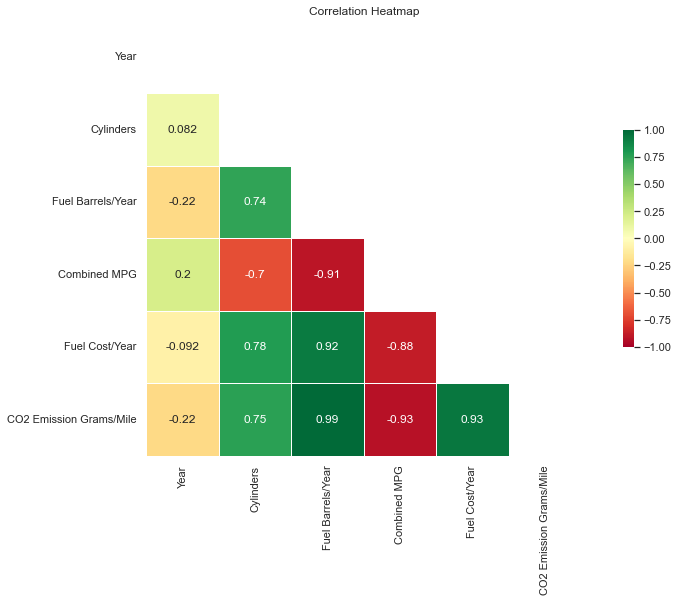

In [23]:
# Your response here. 
# Your response here. 
#Finding correlations within the df

#Set the variables
corrmat = df[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']].corr()       
mask = np.triu(np.ones_like(corrmat, dtype=bool)) 
top_corr_features = corrmat.index
plt.title("Correlation Heatmap")

#Plot the heatmap
sns.heatmap(corrmat,  
            mask = mask,
            cmap='RdYlGn',
            square=True, 
            linewidth=0.5, 
            annot = True,
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .5})

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

array([0.03700281, 0.02101385])

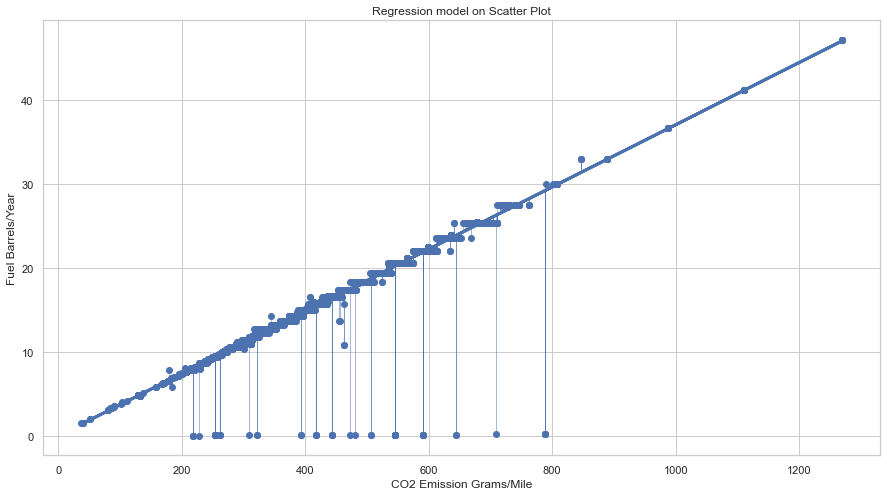

In [24]:
# Your response here. 
x = df['CO2 Emission Grams/Mile']
y = df['Fuel Barrels/Year']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.scatter(x,y)
plt.plot(x, p(x), lw=3)
plt.vlines(x, p(x), y, lw=0.5)
plt.title('Regression model on Scatter Plot')
plt.xlabel('CO2 Emission Grams/Mile')
plt.ylabel('Fuel Barrels/Year')
z

In [25]:
# Your response here. 
x = df[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]

y = df['CO2 Emission Grams/Mile']

modelo=sm.OLS(y, x).fit()

pred = modelo.predict(x)

I'm using a Liner Regression with Ordinary Least Squares regression (OLS).

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [26]:
# Your response here. 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           5.57e-05
Time:                        12:41:44   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6988      2.791     18.168      0.000      44.264      57.134
Y             -3.6324      0.470     -7.734      0.000      -4.716      -2.549
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.714
Skew:                          -1.010   Prob(JB):                        0.424
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
modelo.params

Year                  0.062994
Cylinders             0.887349
Fuel Barrels/Year    19.858822
Combined MPG         -3.050862
Fuel Cost/Year        0.029197
dtype: float64

Text(0.5, 1.0, 'CO2 Emission Grams/Mile vs Combined MPG')

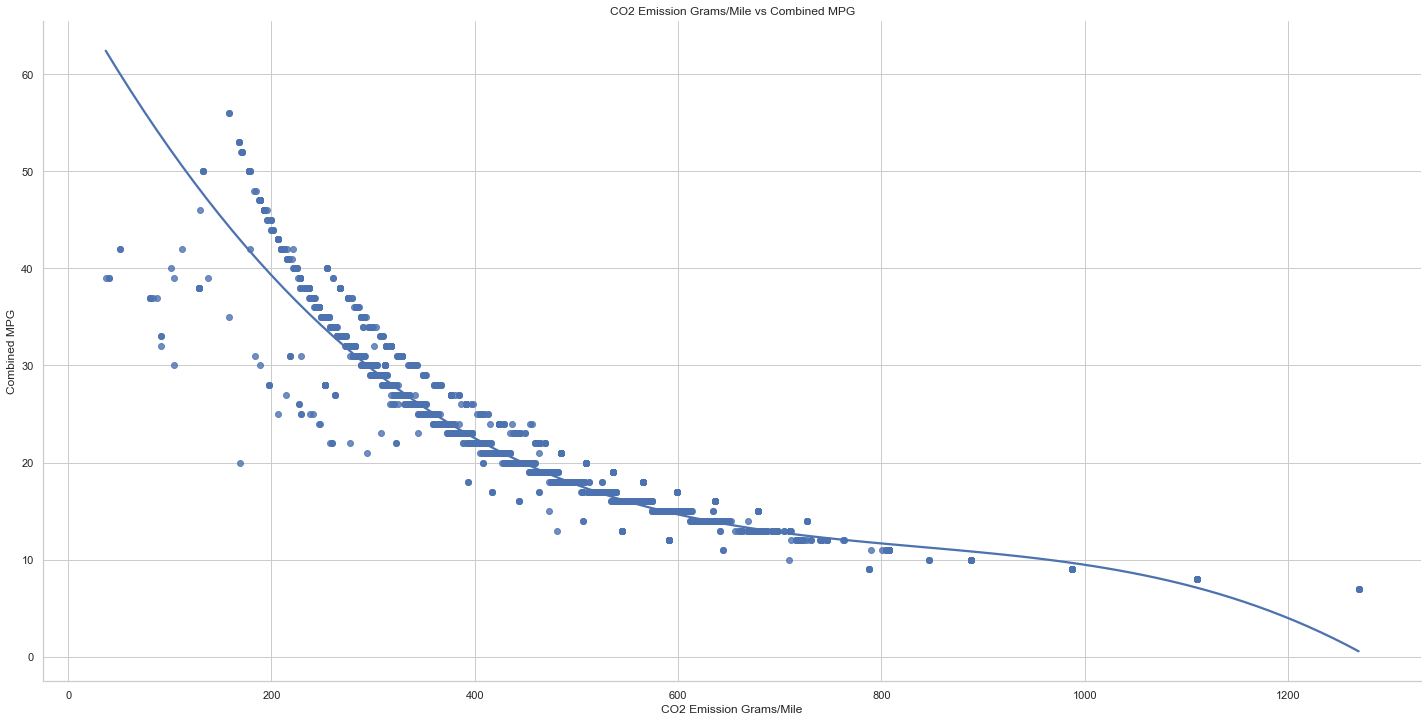

In [28]:
sns.lmplot(x='CO2 Emission Grams/Mile', y='Combined MPG', data=df, order=3, ci=None, height=10, aspect=2);
ax = plt.gca()
ax.set_title("CO2 Emission Grams/Mile vs Combined MPG")

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 